## Tannis McCartney
## May 27, 2022

### This notebook carries out analysis and visualization of customer profiling flags

## Contents:
### 01 Import libraries
### 02 Import data
### 03 Create (and visualize) an age_range profiling flag
### 04 Create (and visualize) a has_dependants profiling flag
### 05 Create (and visualize) an is_married profiling flag
### 06 Create (and visualize) an income_bracket profiling flag
### 07 Look at number of orders for each department
### 08 Aggregate profiling variables (min, mean, max) for usage frequency (order_number) and expenditure (prices)

# 01 Import libraries

In [1]:
# Import libraries for analysis and visualization (separate cells is faster than a single cell)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\4 Python Fundamentals for Data Analysts\05-2022 Instacart Basket Analysis'

In [4]:
# Import the data
cust_5_plus_orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_5_plus_orders.pkl'))
cust_5_plus_orders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income,region,low_activity_customer
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False


In [5]:
# Check the shape of the dataframe
cust_5_plus_orders.shape

(30991542, 32)

# 03 Create (and visualize) an age profiling variable

In [6]:
# Change numerical display format (i.e. reduce use of scientific notation)
pd.set_option('display.float_format', str)

In [29]:
# Look at the statistics for the age column
round(cust_5_plus_orders['age'].describe())

count   30991542.0
mean          49.0
std           18.0
min           18.0
25%           33.0
50%           49.0
75%           65.0
max           81.0
Name: age, dtype: float64

In [30]:
# Create an age-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['age'] >= 0) & (cust_5_plus_orders['age'] < 30), 'age_range'] = '0-29'

In [21]:
# Create an age-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['age'] >= 30) & (cust_5_plus_orders['age'] < 50), 'age_range'] = '30-49'

In [32]:
# Create an age-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['age'] >= 50) & (cust_5_plus_orders['age'] < 70), 'age_range'] = '50-69'

In [23]:
# Create an age-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['age'] >= 70) & (cust_5_plus_orders['age'] < 90), 'age_range'] = '70-89'

In [24]:
# Create an age-range flag
cust_5_plus_orders.loc[cust_5_plus_orders['age'] >= 90 , 'age_range'] = '90 plus'

In [33]:
# Check the frequency table of the Age_Range column
cust_5_plus_orders['age_range'].value_counts()

30-49    9738888
50-69    9612305
0-29     5822773
70-89    5817576
Name: age_range, dtype: int64

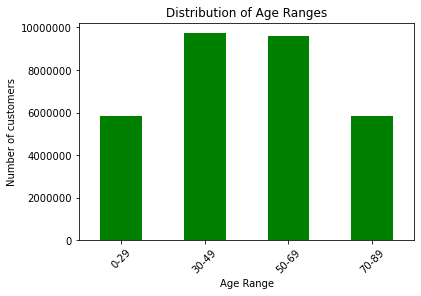

In [35]:
# Show distribution of age_range
bar = cust_5_plus_orders['age_range'].value_counts().sort_index().plot.bar(
    color = ['green'],
    title = 'Distribution of Age Ranges',
    xlabel = 'Age Range',
    ylabel = 'Number of customers')
bar.ticklabel_format(useOffset=False, style='plain', axis='y')
bar.tick_params(axis='x', rotation=45)

In [36]:
# Export visualization
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '11-bar-age_range.png'), bbox_inches='tight')

# 04 Create (and visualize) a has_dependents profiling variable

In [37]:
# Check frequency table of dependents
cust_5_plus_orders['dependants'].value_counts()

3    7779192
0    7746697
2    7739960
1    7725693
Name: dependants, dtype: int64

In [38]:
# Create the has_dependants = True flag
cust_5_plus_orders.loc[cust_5_plus_orders['dependants'] > 0, 'has_dependants'] = 'True'

In [39]:
# Create the has_dependants = False flag
cust_5_plus_orders.loc[cust_5_plus_orders['dependants'] == 0, 'has_dependants'] = 'False'

In [40]:
# Check frequency table of has_dependants
cust_5_plus_orders['has_dependants'].value_counts()

True     23244845
False     7746697
Name: has_dependants, dtype: int64

Text(0, 0.5, '')

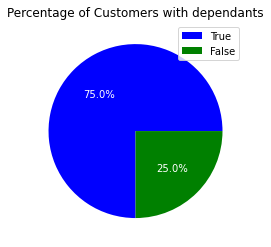

In [70]:
# Plot pie chart for has_dependants
pie = cust_5_plus_orders['has_dependants'].value_counts().plot.pie(
    colors=['b', 'g'],
    title = "Percentage of Customers with dependants",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie.legend(loc="best", labels=['True', 'False'])
pie.set_ylabel('')

In [62]:
# Export pie chart
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '12-pie-has_dependants.png'), bbox_inches='tight')

# 05 Create (and visualize) an is_married flag

In [63]:
# Check frequency table of household_status
cust_5_plus_orders['household_status'].value_counts()

married                             21762270
single                               5099036
divorced/widowed                     2647661
living with parents and siblings     1482575
Name: household_status, dtype: Int64

In [64]:
# Create the is_married = True flag
cust_5_plus_orders.loc[cust_5_plus_orders['household_status'] == 'married', 'is_married'] = 'True'

In [65]:
# Create the is_married = False flags
cust_5_plus_orders.loc[cust_5_plus_orders['household_status'] == 'single', 'is_married'] = 'False'

In [66]:
# Create the is_married = False flags
cust_5_plus_orders.loc[cust_5_plus_orders['household_status'] == 'living with parents and siblings', 'is_married'] = 'False'

In [67]:
# Look at the frequency distribution of the is_married flag
cust_5_plus_orders['is_married'].value_counts()

True     21762270
False     6581611
Name: is_married, dtype: int64

Text(0, 0.5, '')

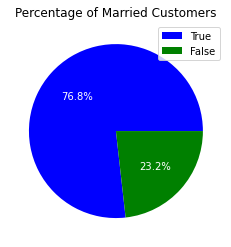

In [69]:
# Plot pie chart for is_married
pie2 = cust_5_plus_orders['is_married'].value_counts().plot.pie(
    colors=['b', 'g'],
    title = "Percentage of Married Customers",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie2.legend(loc="best", labels=['True', 'False'])
pie2.set_ylabel('')

In [71]:
# Export pie chart
pie2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '13-pie-is_married.png'), bbox_inches='tight')

# 06 Create (and visualize) an income profiling flag

In [74]:
# Look at the distribution of income
round(cust_5_plus_orders['income'].describe())

count   30991542.0
mean       99673.0
std        43139.0
min        25903.0
25%        67289.0
50%        96765.0
75%       128101.0
max       593901.0
Name: income, dtype: float64

In [75]:
# Create an income-range flag
cust_5_plus_orders.loc[cust_5_plus_orders['income'] < 50000 , 'income_bracket'] = '00-50k'

In [76]:
# Create an income-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['income'] > 50000) & (cust_5_plus_orders['income'] < 100000), 'income_bracket'] = '50-100k'

In [77]:
# Create an income-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['income'] >= 100000) & (cust_5_plus_orders['income'] < 200000), 'income_bracket'] = '100-200k'

In [78]:
# Create an income-range flag
cust_5_plus_orders.loc[(cust_5_plus_orders['income'] >= 200000) & (cust_5_plus_orders['income'] < 500000), 'income_bracket'] = '200-500k'

In [79]:
# Create an income-range flag
cust_5_plus_orders.loc[cust_5_plus_orders['income'] >= 500000, 'income_bracket'] = '500k plus'

In [80]:
# Check the frequency distribution of the new column
cust_5_plus_orders['income_bracket'].value_counts()

100-200k     13964642
50-100k      13406591
00-50k        3366020
200-500k       235220
500k plus       19069
Name: income_bracket, dtype: int64

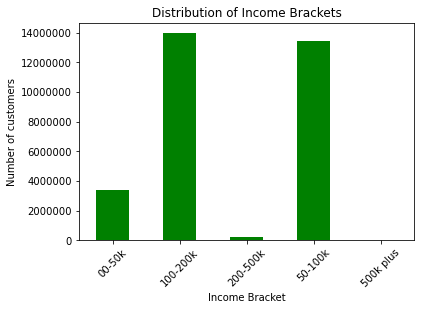

In [83]:
# Plot the distribution of incomes
bar2 = cust_5_plus_orders['income_bracket'].value_counts().sort_index().plot.bar(
    color = ['green'],
    title = 'Distribution of Income Brackets',
    xlabel = 'Income Bracket',
    ylabel = 'Number of customers')
bar2.ticklabel_format(useOffset=False, style='plain', axis='y')
bar2.tick_params(axis='x', rotation=45)

In [84]:
# Export the visualization
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '14-bar-income_bracket.png'), bbox_inches='tight')

# 07 Look at number of orders for each department

In [85]:
# Load departments
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), header=0, names=['department_id', 'department'])
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [86]:
# Convert departments to dictionary
data_dict = dict(departments.values)
print(data_dict)

{1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'}


In [87]:
# Create list of departments using data dictionary
depts = cust_5_plus_orders['department_id'].map(data_dict)
depts.value_counts()

produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department_id, dtype: int64

In [88]:
# Add list to dataframe
cust_5_plus_orders['dept'] = depts

In [78]:
# Check new column on dataframe
pd.set_option('display.max_columns', None)
cust_5_plus_orders.tail(25)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income,region,low_activity_customer,age_range,has_dependants,is_married,income_bracket,dept
32433001,2738626,106143,2,3,17,8.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Slowest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433002,218446,106143,3,4,0,8.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433003,2645700,106143,4,3,21,6.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Slowest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433004,42576,106143,5,3,22,7.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Slowest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433005,1053604,106143,6,1,20,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433006,2409631,106143,7,1,0,14.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433007,1943329,106143,8,1,1,7.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433008,477467,106143,9,5,2,4.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Least orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433009,2835422,106143,10,2,11,11.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages
32433010,634152,106143,11,4,0,16.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,26,Regular Customer,10.7,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific,False,20-29,False,False,50-100k,beverages


Text(0.5, 0, 'Number of Products Ordered (millions)')

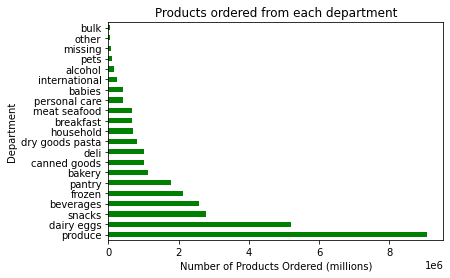

In [109]:
# Plot sales by department (count)
bar3 = cust_5_plus_orders['dept'].value_counts().plot.barh(
    color = ['green'],
    title = 'Products ordered from each department',
    ylabel = 'Department')
bar3.set_xlabel('Number of Products Ordered (millions)')

In [110]:
# Export visualization
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '15-bar-departments.png'), bbox_inches='tight')

# 10 Aggregate profiling variables (min, mean, max) for usage frequency (order_number) and expenditure (prices)

In [111]:
# Aggregate by age_range for usage frequency
round(cust_5_plus_orders.groupby('age_range').agg({'order_number':['min', 'mean', 'max']}),2)

order_number          
                   min  mean max
age_range                       
0-29                 1  17.8  99
30-49                1 17.89  99
50-69                1 17.83  99
70-89                1 17.78  99

In [112]:
# Aggregate by has_dependants for usage frequency
round(cust_5_plus_orders.groupby('has_dependants').agg({'order_number':['min', 'mean', 'max']}),2)

order_number          
                        min  mean max
has_dependants                       
False                     1 17.96  99
True                      1 17.79  99

In [113]:
# Aggregate by is_married for usage frequency
round(cust_5_plus_orders.groupby('is_married').agg({'order_number':['min', 'mean', 'max']}),2)

order_number          
                    min  mean max
is_married                       
False                 1 17.95  99
True                  1 17.78  99

In [114]:
# Aggregate by income_bracket for usage frequency
round(cust_5_plus_orders.groupby('income_bracket').agg({'order_number':['min', 'mean', 'max']}),2)

order_number          
                        min  mean max
income_bracket                       
00-50k                    1 16.84  99
100-200k                  1 17.88  99
200-500k                  1 20.06  99
50-100k                   1  18.0  99
500k plus                 1 19.65  99

In [115]:
# Aggregate by age_range for expenditure
round(cust_5_plus_orders.groupby('age_range').agg({'prices':['min', 'mean', 'max']}),2)

prices          
             min mean  max
age_range                 
0-29         1.0 7.79 25.0
30-49        1.0  7.8 25.0
50-69        1.0  7.8 25.0
70-89        1.0  7.8 25.0

In [116]:
# Aggregate by has_dependants for expenditure
round(cust_5_plus_orders.groupby('has_dependants').agg({'prices':['min', 'mean', 'max']}),2)

prices          
                  min mean  max
has_dependants                 
False             1.0 7.79 25.0
True              1.0  7.8 25.0

In [117]:
# Aggregate by age_range for expenditure
round(cust_5_plus_orders.groupby('is_married').agg({'prices':['min', 'mean', 'max']}),2)

prices          
              min mean  max
is_married                 
False         1.0 7.79 25.0
True          1.0 7.79 25.0

In [118]:
# Aggregate by age_range for expenditure
round(cust_5_plus_orders.groupby('income_bracket').agg({'prices':['min', 'mean', 'max']}),2)

prices          
                  min mean  max
income_bracket                 
00-50k            1.0 6.71 25.0
100-200k          1.0 7.96 25.0
200-500k          1.0 7.78 25.0
50-100k           1.0 7.89 25.0
500k plus         1.0 7.73 25.0

In [119]:
# Export data for continuation in part 3
cust_5_plus_orders.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'notebook_10_part_2_intermediary.pkl'))